# 使用梯度上升求解主成分

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0, 100, size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10, size=100)

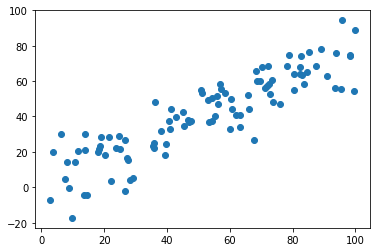

In [18]:
plt.scatter(X[:,0], X[:,1])
plt.show()

# demean

In [19]:
def demean(X):
    return X - np.mean(X, axis=0)

In [20]:
X_demean = demean(X)

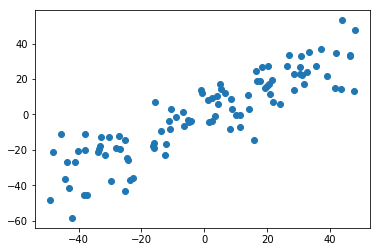

In [21]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [22]:
np.mean(X_demean[:,0])

5.826450433232821e-15

In [23]:
np.mean(X_demean[:,1])

4.831690603168682e-15

# 梯度上升

In [24]:
# 目标函数，求方差。
def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)

In [25]:
# 利用数学推导出的公式求解w
def df_math(w, X):
    return (X.T.dot(X.dot(w))) * 2 / len(X)

In [26]:
# 调试梯度
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [27]:
# 单位化向量w
def direction(w):
    return w / np.linalg.norm(w)

# 梯度上升
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w) # 将w向量单位化
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X) # 求梯度
        last_w = w
        w = w + gradient * eta
        w = direction(w)
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break;
        cur_iter += 1
    return w

In [28]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.33095737, 0.0050651 ])

In [29]:
eta = 0.001

In [30]:
## 梯度上升时不能使用StandardScaler标准化数据
## 因为这样会使得标准差为1，就求不出最大值
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77023597, 0.63775901])

In [31]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77023597, 0.63775901])

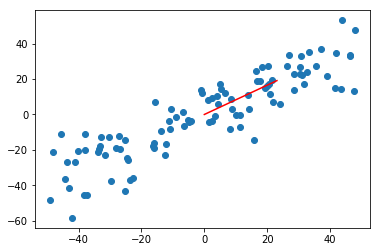

In [32]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0, w[0]*30],[0,w[1]*30], color="red")
plt.show()

In [33]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0, 100, size=100)
X2[:,1] = 0.75 * X2[:,0] + 3. 

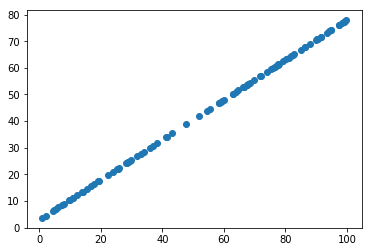

In [34]:
plt.scatter(X2[:,0], X2[:, 1])
plt.show()

In [35]:
X2_demean = demean(X2)

In [36]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

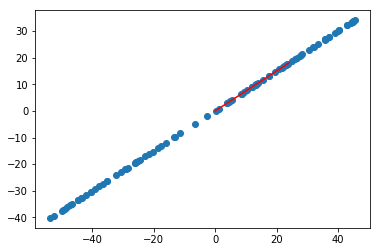

In [37]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0, w2[0]*30],[0,w2[1]*30], color="red")
plt.show()